# Hyperband Search

# All Libraries (Must execute)

In [1]:
# Numpy, pandas, matplotlib, statistics, os, bayes_opt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import time
from bayes_opt import BayesianOptimization


# Sklearn

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV


# Tensorflow & keras


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer, ReLU, PReLU, LeakyReLU, Softmax
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import BayesianOptimization
from kerastuner.tuners import Hyperband

<ipython-input-1-551cc858abc6>:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Dataset (Must execute)

In [2]:
df = pd.read_csv('D:\\Drive 1\\MS\\Masters\\Additive Manufacturing\\AI in AM\\1\\Data 3.csv', header = 0)
df.head()

,Sr. #,Power,Speed,Thickness,Spacing,Density
0,1,25.0,700.0,0.02,0.08,76.02
1,2,25.0,700.0,0.02,0.04,91.22
2,3,100.0,1700.0,0.02,0.06,98.12
3,4,80.0,1500.0,0.02,0.04,98.33
4,5,80.0,700.0,0.02,0.08,99.02


In [3]:
df.isnull().any()

Sr. #        False
Power        False
Speed        False
Thickness    False
Spacing      False
Density      False
dtype: bool

In [4]:
# Conversion into numpy array for further processing
X = df.iloc[:,1:5]
X = pd.DataFrame(X)
Y = df.iloc[:,5]
X_num = X.values
Y_num = Y.values

# Train-test split (Must execute)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.3, random_state = 50)
print(X_train.shape)
print(X_test.shape)

(58, 4)
(26, 4)


# Feature Scaling (Must execute)

(i) Standardization &
(ii) Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaling = StandardScaler ()

In [7]:
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.fit_transform(X_test)
X_scaled = scaling.fit_transform(X)

In [8]:
min_max=MinMaxScaler()
X_train_normalized=pd.DataFrame(min_max.fit_transform(X_train))
X_test_normalized=pd.DataFrame(min_max.fit_transform(X_test))
X_train_normalized.head()

,0,1,2,3
0,0.429272,0.311805,0.000000,0.20
1,0.306623,0.067761,1.000000,0.80
2,0.306623,0.004764,1.000000,0.71
3,0.511038,0.177343,0.333333,1.00
4,0.511038,0.258867,0.666667,0.40


In [9]:
X_test_normalized.head()

,0,1,2,3
0,0.272727,0.000000,1.000000,0.800
1,0.545455,0.468461,0.333333,0.800
2,0.889455,0.597645,0.000000,0.678
3,0.565091,0.597645,0.000000,0.678
4,0.636364,0.537426,1.000000,0.700


# Hyperparameter optimization 3
Hyperband search

In [10]:
def build_model_3(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [11]:
tuner_3 = Hyperband(
    build_model_3,
    objective='val_mean_absolute_error',
    max_epochs=100,
    hyperband_iterations=1,
    overwrite=True)

In [12]:
tuner_3.search(X_train_scaled, Y_train,
             epochs=5000,
             validation_data=(X_test_scaled, Y_test))

Trial 254 Complete [00h 00m 17s]
val_mean_absolute_error: 29.70636749267578

Best val_mean_absolute_error So Far: 1.5280932188034058
Total elapsed time: 00h 19m 36s
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner_3.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [14]:
tuner_3.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 224
learning_rate: 0.01
units_1: 224
units_2: 224
units_3: 96
units_4: 64
units_5: 32
units_6: 416
units_7: 96
units_8: 224
units_9: 64
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 1.5280932188034058
Trial summary
Hyperparameters:
num_layers: 7
units_0: 192
learning_rate: 0.01
units_1: 64
units_2: 192
units_3: 288
units_4: 352
units_5: 384
units_6: 448
units_7: 384
units_8: 288
units_9: 320
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 2.450385808944702
Trial summary
Hyperparameters:
num_layers: 7
units_0: 32
learning_rate: 0.01
units_1: 416
units_2: 480
units_3: 160
units_4: 416
units_5: 288
units_6: 64
units_7: 64
units_8: 160
units_9: 352
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 881bb8138

# Model Implementation in Keras

In [15]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
opt = SGD(learning_rate = 0.01, clipnorm=1.0)    
model = Sequential ()
model.add(InputLayer(X_train.shape[1]))
model.add(Dense(224,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(224,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(224,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(96,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(64,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(416,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(96,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(224,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(64,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(1))
model.compile(loss = root_mean_squared_error, optimizer = opt)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 224)               1120      
_________________________________________________________________
dense_11 (Dense)             (None, 224)               50400     
_________________________________________________________________
dense_12 (Dense)             (None, 224)               50400     
_________________________________________________________________
dense_13 (Dense)             (None, 96)                21600     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 416)              

In [16]:
history = model.fit(X_train_scaled, Y_train, verbose = 1, epochs=5000, batch_size = 32, validation_data = (X_test_scaled,Y_test))

Epoch 1/5000
2/2 [==============================] - 1s 377ms/step - loss: 97.2770 - val_loss: 97.2293
Epoch 2/5000
2/2 [==============================] - 0s 15ms/step - loss: 97.2321 - val_loss: 97.1915
Epoch 3/5000
2/2 [==============================] - 0s 15ms/step - loss: 97.1965 - val_loss: 97.1523
Epoch 4/5000
2/2 [==============================] - 0s 14ms/step - loss: 97.1575 - val_loss: 97.1073
Epoch 5/5000
2/2 [==============================] - 0s 14ms/step - loss: 97.1104 - val_loss: 97.0587
Epoch 6/5000
2/2 [==============================] - 0s 14ms/step - loss: 97.0626 - val_loss: 97.0092
Epoch 7/5000
2/2 [==============================] - 0s 15ms/step - loss: 97.0127 - val_loss: 96.9588
Epoch 8/5000
2/2 [==============================] - 0s 14ms/step - loss: 96.9605 - val_loss: 96.9072
Epoch 9/5000
2/2 [==============================] - 0s 13ms/step - loss: 96.9099 - val_loss: 96.8545
Epoch 10/5000
2/2 [==============================] - 0s 13ms/step - loss: 96.8570 - val_lo

2/2 [==============================] - 0s 15ms/step - loss: 5.8521 - val_loss: 6.6723
Epoch 163/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.2938 - val_loss: 6.4966
Epoch 164/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.3356 - val_loss: 6.3674
Epoch 165/5000
2/2 [==============================] - 0s 16ms/step - loss: 5.3172 - val_loss: 6.5675
Epoch 166/5000
2/2 [==============================] - 0s 16ms/step - loss: 5.7213 - val_loss: 6.5411
Epoch 167/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.7568 - val_loss: 6.6042
Epoch 168/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.8352 - val_loss: 6.6135
Epoch 169/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.5330 - val_loss: 6.5989
Epoch 170/5000
2/2 [==============================] - 0s 13ms/step - loss: 5.6085 - val_loss: 6.6602
Epoch 171/5000
2/2 [==============================] - 0s 15ms/step - loss: 5.6627 - val_loss: 6.5767
Epoch

2/2 [==============================] - 0s 14ms/step - loss: 4.8281 - val_loss: 6.4180
Epoch 325/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.4538 - val_loss: 6.4339
Epoch 326/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.6341 - val_loss: 6.5337
Epoch 327/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.2623 - val_loss: 6.4529
Epoch 328/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.4944 - val_loss: 6.5238
Epoch 329/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.3873 - val_loss: 6.5508
Epoch 330/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.3209 - val_loss: 6.6253
Epoch 331/5000
2/2 [==============================] - 0s 13ms/step - loss: 4.6499 - val_loss: 6.5125
Epoch 332/5000
2/2 [==============================] - 0s 13ms/step - loss: 4.7843 - val_loss: 6.5281
Epoch 333/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.2739 - val_loss: 6.4653
Epoch

2/2 [==============================] - 0s 14ms/step - loss: 3.8867 - val_loss: 6.2776
Epoch 487/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.2491 - val_loss: 6.2664
Epoch 488/5000
2/2 [==============================] - ETA: 0s - loss: 3.974 - 0s 14ms/step - loss: 4.0641 - val_loss: 6.4267
Epoch 489/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.5813 - val_loss: 6.4491
Epoch 490/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.3491 - val_loss: 6.4692
Epoch 491/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8411 - val_loss: 6.3697
Epoch 492/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.0965 - val_loss: 6.3576
Epoch 493/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.2499 - val_loss: 6.3893
Epoch 494/5000
2/2 [==============================] - 0s 13ms/step - loss: 4.2556 - val_loss: 6.4422
Epoch 495/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.9431 

Epoch 567/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.3293 - val_loss: 6.2085
Epoch 568/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.9007 - val_loss: 6.2040
Epoch 569/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7271 - val_loss: 6.2284
Epoch 570/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6220 - val_loss: 6.2446
Epoch 571/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.9505 - val_loss: 6.2183
Epoch 572/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7334 - val_loss: 6.2018
Epoch 573/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5357 - val_loss: 6.3054
Epoch 574/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.0982 - val_loss: 6.1691
Epoch 575/5000
2/2 [==============================] - 0s 12ms/step - loss: 4.1689 - val_loss: 6.3783
Epoch 576/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.0437 - val_los

2/2 [==============================] - 0s 14ms/step - loss: 3.8445 - val_loss: 6.1323
Epoch 649/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.8900 - val_loss: 6.0949
Epoch 650/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.0169 - val_loss: 6.0971
Epoch 651/5000
2/2 [==============================] - 0s 12ms/step - loss: 4.0685 - val_loss: 6.0658
Epoch 652/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.9583 - val_loss: 6.2239
Epoch 653/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.2342 - val_loss: 6.0569
Epoch 654/5000
2/2 [==============================] - 0s 16ms/step - loss: 4.0057 - val_loss: 6.1510
Epoch 655/5000
2/2 [==============================] - 0s 13ms/step - loss: 4.1210 - val_loss: 6.1917
Epoch 656/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.9570 - val_loss: 6.1306
Epoch 657/5000
2/2 [==============================] - 0s 11ms/step - loss: 3.9913 - val_loss: 6.1034
Epoch

Epoch 810/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.9083 - val_loss: 6.2341
Epoch 811/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6509 - val_loss: 6.2837
Epoch 812/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.8948 - val_loss: 6.3693
Epoch 813/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.9381 - val_loss: 6.3277
Epoch 814/5000
2/2 [==============================] - 0s 13ms/step - loss: 4.0164 - val_loss: 6.5003
Epoch 815/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4701 - val_loss: 6.5762
Epoch 816/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.7942 - val_loss: 6.3776
Epoch 817/5000
2/2 [==============================] - 0s 12ms/step - loss: 4.1131 - val_loss: 6.3570
Epoch 818/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.0470 - val_loss: 6.2912
Epoch 819/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.9663 - val_los

2/2 [==============================] - 0s 15ms/step - loss: 3.6548 - val_loss: 6.2328
Epoch 892/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8284 - val_loss: 6.1747
Epoch 893/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.3940 - val_loss: 6.3269
Epoch 894/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.8393 - val_loss: 6.3189
Epoch 895/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.0025 - val_loss: 6.2584
Epoch 896/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.9271 - val_loss: 6.4017
Epoch 897/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7384 - val_loss: 6.4043
Epoch 898/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5878 - val_loss: 6.4024
Epoch 899/5000
2/2 [==============================] - 0s 15ms/step - loss: 4.1253 - val_loss: 6.2494
Epoch 900/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.7724 - val_loss: 6.1795
Epoch

2/2 [==============================] - 0s 14ms/step - loss: 3.9529 - val_loss: 6.1535
Epoch 1053/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6586 - val_loss: 6.1326
Epoch 1054/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.9047 - val_loss: 6.1484
Epoch 1055/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6175 - val_loss: 6.2213
Epoch 1056/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6725 - val_loss: 6.2154
Epoch 1057/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6660 - val_loss: 6.1649
Epoch 1058/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8863 - val_loss: 6.0676
Epoch 1059/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6848 - val_loss: 6.1218
Epoch 1060/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6865 - val_loss: 6.0701
Epoch 1061/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7727 - val_loss: 6.1

2/2 [==============================] - 0s 14ms/step - loss: 3.7818 - val_loss: 6.0378
Epoch 1213/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5250 - val_loss: 6.0343
Epoch 1214/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.5206 - val_loss: 6.0122
Epoch 1215/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6005 - val_loss: 6.0278
Epoch 1216/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5048 - val_loss: 5.9116
Epoch 1217/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6206 - val_loss: 5.8745
Epoch 1218/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5746 - val_loss: 5.8764
Epoch 1219/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6616 - val_loss: 5.9900
Epoch 1220/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4991 - val_loss: 5.7918
Epoch 1221/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6963 - val_loss: 5.8

2/2 [==============================] - 0s 14ms/step - loss: 3.7334 - val_loss: 6.0554
Epoch 1373/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7122 - val_loss: 5.8036
Epoch 1374/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6003 - val_loss: 5.9810
Epoch 1375/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.3507 - val_loss: 5.9980
Epoch 1376/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6497 - val_loss: 5.9016
Epoch 1377/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8250 - val_loss: 6.0192
Epoch 1378/5000
2/2 [==============================] - 0s 19ms/step - loss: 3.7971 - val_loss: 6.0501
Epoch 1379/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6683 - val_loss: 6.0545
Epoch 1380/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.3208 - val_loss: 6.1885
Epoch 1381/5000
2/2 [==============================] - 0s 19ms/step - loss: 3.4175 - val_loss: 6.1

Epoch 1532/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.7392 - val_loss: 6.5611
Epoch 1533/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6737 - val_loss: 6.2742
Epoch 1534/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7101 - val_loss: 6.1994
Epoch 1535/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.8658 - val_loss: 6.3415
Epoch 1536/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6385 - val_loss: 6.3828
Epoch 1537/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.9152 - val_loss: 6.2706
Epoch 1538/5000
2/2 [==============================] - 0s 12ms/step - loss: 4.0237 - val_loss: 6.3894
Epoch 1539/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5291 - val_loss: 6.4666
Epoch 1540/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7102 - val_loss: 6.4557
Epoch 1541/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.9069

2/2 [==============================] - 0s 12ms/step - loss: 3.6729 - val_loss: 6.2531
Epoch 1613/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7241 - val_loss: 6.0991
Epoch 1614/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4719 - val_loss: 6.1601
Epoch 1615/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8114 - val_loss: 6.0370
Epoch 1616/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6710 - val_loss: 6.1961
Epoch 1617/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.6997 - val_loss: 6.1181
Epoch 1618/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4545 - val_loss: 6.0564
Epoch 1619/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6661 - val_loss: 6.1897
Epoch 1620/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6743 - val_loss: 6.2481
Epoch 1621/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7766 - val_loss: 6.2

2/2 [==============================] - 0s 14ms/step - loss: 3.7611 - val_loss: 6.2351
Epoch 1773/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6553 - val_loss: 6.3011
Epoch 1774/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6936 - val_loss: 6.4709
Epoch 1775/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6816 - val_loss: 6.4083
Epoch 1776/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8607 - val_loss: 6.2618
Epoch 1777/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8212 - val_loss: 6.2003
Epoch 1778/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6633 - val_loss: 6.2955
Epoch 1779/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8639 - val_loss: 6.0962
Epoch 1780/5000
2/2 [==============================] - 0s 14ms/step - loss: 4.0266 - val_loss: 6.0880
Epoch 1781/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6115 - val_loss: 6.2

2/2 [==============================] - 0s 42ms/step - loss: 3.6908 - val_loss: 6.3723
Epoch 1933/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.7482 - val_loss: 6.3028
Epoch 1934/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6282 - val_loss: 6.3380
Epoch 1935/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.7242 - val_loss: 6.2199
Epoch 1936/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6503 - val_loss: 6.1421
Epoch 1937/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.7493 - val_loss: 6.3860
Epoch 1938/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6660 - val_loss: 6.3160
Epoch 1939/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8296 - val_loss: 6.3247
Epoch 1940/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.6303 - val_loss: 6.1850
Epoch 1941/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.5843 - val_loss: 6.4

2/2 [==============================] - 0s 13ms/step - loss: 3.8380 - val_loss: 6.4914
Epoch 2093/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5765 - val_loss: 6.4002
Epoch 2094/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.5317 - val_loss: 6.2686
Epoch 2095/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.2378 - val_loss: 6.3220
Epoch 2096/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7624 - val_loss: 6.3368
Epoch 2097/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6679 - val_loss: 6.4320
Epoch 2098/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7943 - val_loss: 6.3312
Epoch 2099/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5241 - val_loss: 6.1706
Epoch 2100/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.8104 - val_loss: 6.3237
Epoch 2101/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8401 - val_loss: 6.2

2/2 [==============================] - 0s 14ms/step - loss: 3.8002 - val_loss: 6.4371
Epoch 2253/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7076 - val_loss: 6.5038
Epoch 2254/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6212 - val_loss: 6.4439
Epoch 2255/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7602 - val_loss: 6.4557
Epoch 2256/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4365 - val_loss: 6.4055
Epoch 2257/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6362 - val_loss: 6.3353
Epoch 2258/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.9036 - val_loss: 6.2670
Epoch 2259/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7066 - val_loss: 6.3938
Epoch 2260/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6550 - val_loss: 6.4016
Epoch 2261/5000
2/2 [==============================] - 0s 19ms/step - loss: 3.6793 - val_loss: 6.3

2/2 [==============================] - 0s 13ms/step - loss: 4.0489 - val_loss: 6.4059
Epoch 2413/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6057 - val_loss: 6.3955
Epoch 2414/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.8829 - val_loss: 6.3926
Epoch 2415/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7300 - val_loss: 6.5335
Epoch 2416/5000
2/2 [==============================] - 0s 19ms/step - loss: 3.6741 - val_loss: 6.4742
Epoch 2417/5000
2/2 [==============================] - 0s 37ms/step - loss: 3.6397 - val_loss: 6.7047
Epoch 2418/5000
2/2 [==============================] - 0s 21ms/step - loss: 3.8387 - val_loss: 6.4847
Epoch 2419/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6570 - val_loss: 6.4897
Epoch 2420/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.6778 - val_loss: 6.4138
Epoch 2421/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.5180 - val_loss: 6.5

2/2 [==============================] - 0s 15ms/step - loss: 3.5587 - val_loss: 6.5745
Epoch 2573/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6755 - val_loss: 6.6964
Epoch 2574/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4743 - val_loss: 6.6231
Epoch 2575/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7129 - val_loss: 6.5969
Epoch 2576/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7784 - val_loss: 6.4652
Epoch 2577/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6377 - val_loss: 6.4111
Epoch 2578/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8806 - val_loss: 6.3510
Epoch 2579/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6055 - val_loss: 6.3793
Epoch 2580/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6642 - val_loss: 6.3639
Epoch 2581/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6138 - val_loss: 6.3

2/2 [==============================] - 0s 18ms/step - loss: 3.5798 - val_loss: 6.4611
Epoch 2733/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.5889 - val_loss: 6.6020
Epoch 2734/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.7524 - val_loss: 6.5052
Epoch 2735/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4686 - val_loss: 6.4788
Epoch 2736/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.4319 - val_loss: 6.4109
Epoch 2737/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6238 - val_loss: 6.5404
Epoch 2738/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5732 - val_loss: 6.3980
Epoch 2739/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7919 - val_loss: 6.2672
Epoch 2740/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6465 - val_loss: 6.4262
Epoch 2741/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4814 - val_loss: 6.3

2/2 [==============================] - 0s 13ms/step - loss: 3.8666 - val_loss: 6.2314
Epoch 2893/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6015 - val_loss: 6.0641
Epoch 2894/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7162 - val_loss: 6.3135
Epoch 2895/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5713 - val_loss: 6.3352
Epoch 2896/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.2102 - val_loss: 6.2807
Epoch 2897/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4795 - val_loss: 6.3090
Epoch 2898/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6721 - val_loss: 6.4394
Epoch 2899/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6003 - val_loss: 6.2543
Epoch 2900/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5175 - val_loss: 6.3737
Epoch 2901/5000
2/2 [==============================] - ETA: 0s - loss: 3.687 - 0s 15ms/step - loss

2/2 [==============================] - 0s 12ms/step - loss: 3.7344 - val_loss: 6.4973
Epoch 3053/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6404 - val_loss: 6.3903
Epoch 3054/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4264 - val_loss: 6.4573
Epoch 3055/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5189 - val_loss: 6.7367
Epoch 3056/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8518 - val_loss: 6.4883
Epoch 3057/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4773 - val_loss: 6.4222
Epoch 3058/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5151 - val_loss: 6.4527
Epoch 3059/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6739 - val_loss: 6.3097
Epoch 3060/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7828 - val_loss: 6.5034
Epoch 3061/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4809 - val_loss: 6.4

2/2 [==============================] - 0s 13ms/step - loss: 3.6862 - val_loss: 6.5597
Epoch 3213/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6480 - val_loss: 6.5399
Epoch 3214/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7250 - val_loss: 6.7181
Epoch 3215/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7419 - val_loss: 6.5016
Epoch 3216/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.3853 - val_loss: 6.7026
Epoch 3217/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.8180 - val_loss: 6.7367
Epoch 3218/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4682 - val_loss: 6.7489
Epoch 3219/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7059 - val_loss: 6.4330
Epoch 3220/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4876 - val_loss: 6.4578
Epoch 3221/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4019 - val_loss: 6.4

2/2 [==============================] - 0s 19ms/step - loss: 3.6561 - val_loss: 6.2608
Epoch 3373/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.3362 - val_loss: 6.4041
Epoch 3374/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6402 - val_loss: 6.2762
Epoch 3375/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.5978 - val_loss: 6.3213
Epoch 3376/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7736 - val_loss: 6.2550
Epoch 3377/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4749 - val_loss: 6.3707
Epoch 3378/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4165 - val_loss: 6.5661
Epoch 3379/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.3557 - val_loss: 6.4176
Epoch 3380/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5228 - val_loss: 6.4273
Epoch 3381/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7056 - val_loss: 6.3

2/2 [==============================] - 0s 17ms/step - loss: 3.7401 - val_loss: 6.2583
Epoch 3533/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4208 - val_loss: 6.3873
Epoch 3534/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6973 - val_loss: 6.1542
Epoch 3535/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6521 - val_loss: 6.0914
Epoch 3536/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4934 - val_loss: 6.0967
Epoch 3537/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.3746 - val_loss: 6.2446
Epoch 3538/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6689 - val_loss: 6.0572
Epoch 3539/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7075 - val_loss: 6.0695
Epoch 3540/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.6453 - val_loss: 6.0216
Epoch 3541/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.5389 - val_loss: 5.8

2/2 [==============================] - 0s 16ms/step - loss: 3.5816 - val_loss: 6.1159
Epoch 3693/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5233 - val_loss: 6.0754
Epoch 3694/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.5606 - val_loss: 6.2074
Epoch 3695/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6897 - val_loss: 6.2381
Epoch 3696/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4925 - val_loss: 6.1582
Epoch 3697/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5857 - val_loss: 6.0675
Epoch 3698/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7306 - val_loss: 6.2297
Epoch 3699/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.4462 - val_loss: 6.1141
Epoch 3700/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4139 - val_loss: 6.2734
Epoch 3701/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4180 - val_loss: 6.5

2/2 [==============================] - 0s 15ms/step - loss: 3.7412 - val_loss: 6.5298
Epoch 3853/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.8003 - val_loss: 6.4975
Epoch 3854/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.5746 - val_loss: 6.7163
Epoch 3855/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6151 - val_loss: 6.5549
Epoch 3856/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6694 - val_loss: 6.7034
Epoch 3857/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.6255 - val_loss: 6.6114
Epoch 3858/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6935 - val_loss: 6.6001
Epoch 3859/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5225 - val_loss: 6.5172
Epoch 3860/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4842 - val_loss: 6.4458
Epoch 3861/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6286 - val_loss: 6.5

2/2 [==============================] - 0s 14ms/step - loss: 3.7504 - val_loss: 6.5680
Epoch 4013/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.6127 - val_loss: 6.4848
Epoch 4014/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7026 - val_loss: 6.5003
Epoch 4015/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6966 - val_loss: 6.2817
Epoch 4016/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4457 - val_loss: 6.2983
Epoch 4017/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.6797 - val_loss: 6.4825
Epoch 4018/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5869 - val_loss: 6.3946
Epoch 4019/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6201 - val_loss: 6.5068
Epoch 4020/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7359 - val_loss: 6.4755
Epoch 4021/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7600 - val_loss: 6.5

2/2 [==============================] - 0s 14ms/step - loss: 3.3367 - val_loss: 6.3805
Epoch 4173/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5970 - val_loss: 6.2290
Epoch 4174/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.5458 - val_loss: 6.3116
Epoch 4175/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6212 - val_loss: 6.1023
Epoch 4176/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6164 - val_loss: 6.2268
Epoch 4177/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.7604 - val_loss: 6.1628
Epoch 4178/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.5158 - val_loss: 6.0093
Epoch 4179/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.5725 - val_loss: 6.1198
Epoch 4180/5000
2/2 [==============================] - 0s 18ms/step - loss: 3.5008 - val_loss: 6.2090
Epoch 4181/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4070 - val_loss: 6.5

Epoch 4252/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8199 - val_loss: 6.1008
Epoch 4253/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.5433 - val_loss: 6.1813
Epoch 4254/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4897 - val_loss: 6.1588
Epoch 4255/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7072 - val_loss: 6.1311
Epoch 4256/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5470 - val_loss: 6.3372
Epoch 4257/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6792 - val_loss: 6.3929
Epoch 4258/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5446 - val_loss: 6.3758
Epoch 4259/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5441 - val_loss: 6.3432
Epoch 4260/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4572 - val_loss: 6.5597
Epoch 4261/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6981

2/2 [==============================] - 0s 13ms/step - loss: 3.4695 - val_loss: 6.6972
Epoch 4413/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.7322 - val_loss: 6.8439
Epoch 4414/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6825 - val_loss: 6.8658
Epoch 4415/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.7443 - val_loss: 6.7797
Epoch 4416/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6901 - val_loss: 6.7951
Epoch 4417/5000
2/2 [==============================] - 0s 11ms/step - loss: 3.4876 - val_loss: 6.7067
Epoch 4418/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5356 - val_loss: 6.9278
Epoch 4419/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.6584 - val_loss: 6.7622
Epoch 4420/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.7633 - val_loss: 6.7865
Epoch 4421/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4362 - val_loss: 7.1

2/2 [==============================] - 0s 13ms/step - loss: 3.4924 - val_loss: 6.5043
Epoch 4573/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5928 - val_loss: 6.6218
Epoch 4574/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6556 - val_loss: 6.6469
Epoch 4575/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.3330 - val_loss: 6.6468
Epoch 4576/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7436 - val_loss: 6.5739
Epoch 4577/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4717 - val_loss: 6.5696
Epoch 4578/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5394 - val_loss: 6.6534
Epoch 4579/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6146 - val_loss: 6.5272
Epoch 4580/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.6475 - val_loss: 6.4546
Epoch 4581/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7294 - val_loss: 6.5

2/2 [==============================] - 0s 14ms/step - loss: 3.4704 - val_loss: 6.5813
Epoch 4733/5000
2/2 [==============================] - 0s 12ms/step - loss: 3.7745 - val_loss: 6.5380
Epoch 4734/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.4611 - val_loss: 6.4245
Epoch 4735/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6500 - val_loss: 6.2791
Epoch 4736/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.5793 - val_loss: 6.3366
Epoch 4737/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.5222 - val_loss: 6.4688
Epoch 4738/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5746 - val_loss: 6.5495
Epoch 4739/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.3654 - val_loss: 6.4639
Epoch 4740/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4312 - val_loss: 6.4858
Epoch 4741/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4635 - val_loss: 6.3

2/2 [==============================] - 0s 24ms/step - loss: 3.7588 - val_loss: 6.5273
Epoch 4893/5000
2/2 [==============================] - 0s 16ms/step - loss: 3.7240 - val_loss: 6.5456
Epoch 4894/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.2932 - val_loss: 6.4909
Epoch 4895/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.3790 - val_loss: 6.4593
Epoch 4896/5000
2/2 [==============================] - 0s 17ms/step - loss: 3.5371 - val_loss: 6.4342
Epoch 4897/5000
2/2 [==============================] - 0s 18ms/step - loss: 3.4890 - val_loss: 6.3457
Epoch 4898/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.8496 - val_loss: 6.5476
Epoch 4899/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5118 - val_loss: 6.6216
Epoch 4900/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6266 - val_loss: 6.5129
Epoch 4901/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.4062 - val_loss: 6.4

2/2 [==============================] - 0s 14ms/step - loss: 3.5131 - val_loss: 6.7440
Epoch 4973/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.3995 - val_loss: 6.7126
Epoch 4974/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.4029 - val_loss: 6.7822
Epoch 4975/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.3857 - val_loss: 6.7624
Epoch 4976/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.6305 - val_loss: 6.7763
Epoch 4977/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6529 - val_loss: 6.9474
Epoch 4978/5000
2/2 [==============================] - 0s 15ms/step - loss: 3.6721 - val_loss: 6.7994
Epoch 4979/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.5200 - val_loss: 6.8868
Epoch 4980/5000
2/2 [==============================] - 0s 13ms/step - loss: 3.5582 - val_loss: 7.0052
Epoch 4981/5000
2/2 [==============================] - 0s 14ms/step - loss: 3.7134 - val_loss: 6.9

In [17]:
Y_predicted = model.predict (X_test_scaled,verbose =1)

1/1 [==============================] - 0s 2ms/step


# Results Plotting

<ipython-input-18-2aed71b021c6>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(epochs, loss, 'y', Label='Training Loss')
<ipython-input-18-2aed71b021c6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(epochs, val_loss, 'r', Label='Test Loss')


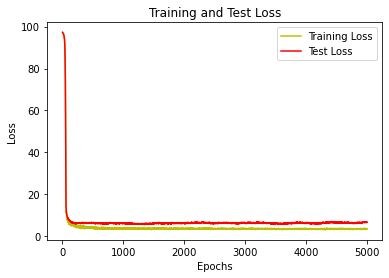

In [18]:
loss = history.history['loss']
val_loss = history.history ['val_loss']
epochs = range (1, len(loss)+1)
plt.plot(epochs, loss, 'y', Label='Training Loss')
plt.plot(epochs, val_loss, 'r', Label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and Test Loss.jpg')
plt.show()

C:\Users\Windows10\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


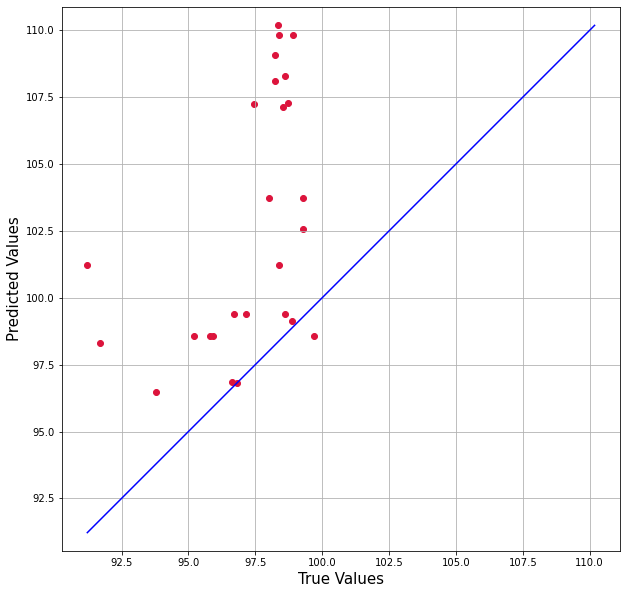

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_predicted, c='crimson')
p1 = max(max(Y_predicted), max(Y_test))
p2 = min(min(Y_predicted), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.grid()
plt.savefig('True Values vs Predicted Values.jpg')
plt.show()

# 5-Fold Cross Validation

In [11]:
df = pd.read_csv('D:\\Drive 1\\MS\\Masters\\Additive Manufacturing\\AI in AM\\1\\Data 3.csv', header =0)
X = df.iloc[:,1:5]
X = pd.DataFrame(X)
Y = df.iloc[:,5]
Y = pd.DataFrame (Y)
X = X.values
Y = Y.values

In [22]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
kf=KFold(5, shuffle = True, random_state=50)
OOS_y = []
OOS_prediction = []
score_list = []
fold = 0
for train, test in kf.split(X):
    fold = fold+1
    opt = SGD(learning_rate = 0.01, clipnorm=1.0)
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    model = Sequential ()
    model.add(InputLayer(X_train.shape[1]))
    model.add(Dense(96,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(352,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(64,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(480,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(320,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(448,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(352,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(384,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(320,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(192,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    model.fit(X_train, Y_train, epochs=4000, verbose = 0, batch_size = 32, validation_data = (X_test, Y_test))
    prediction = model.predict(X_test)
    OOS_y.append(Y_test)
    OOS_prediction.append(prediction)
    score = np.sqrt(metrics.mean_squared_error(prediction, Y_test))
    score_list.append(score)
    print (f"Final score (RMSE): {score}")
mean = statistics.mean(score_list)
print("Mean of 5-fold cross validation is equal to {}".format(mean))
OOS_y = np.concatenate (OOS_y)    
OOS_prediction = np.concatenate (OOS_prediction)
OOS_y = pd.DataFrame(OOS_y)
OOS_prediction = pd.DataFrame (OOS_prediction)
OOS = pd.concat ([df, OOS_y, OOS_prediction], axis = 1)

Final score (RMSE): 21.659796714627408
Final score (RMSE): 3.1727660325297657
Final score (RMSE): 3.980993122778732
Final score (RMSE): 2.2385302724912983
Final score (RMSE): 2.997406207648325
Mean of 5-fold cross validation is equal to 6.8098984700151055


In [12]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
kf=KFold(5, shuffle = True, random_state=50)
OOS_y = []
OOS_prediction = []
score_list = []
fold = 0
for train, test in kf.split(X):
    fold = fold+1
    opt = SGD(learning_rate = 0.01, clipnorm=1.0)
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    model = Sequential ()
    model.add(InputLayer(X_train.shape[1]))
    model.add(Dense(96,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(352,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(64,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(480,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(320,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(448,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(352,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(384,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(320,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(192,activation='relu', bias_regularizer=regularizers.l2(1e-3))) 
    model.add(Dense(1))
    model.compile(loss = 'mean_absolute_error', optimizer = opt)
    model.fit(X_train, Y_train, epochs=4000, verbose = 0, batch_size = 32, validation_data = (X_test, Y_test))
    prediction = model.predict(X_test)
    OOS_y.append(Y_test)
    OOS_prediction.append(prediction)
    score = metrics.mean_absolute_error(prediction, Y_test)
    score_list.append(score)
    print (f"Final score (MAE): {score}")
mean = statistics.mean(score_list)
print("Mean of 5-fold cross validation is equal to {}".format(mean))
OOS_y = np.concatenate (OOS_y)    
OOS_prediction = np.concatenate (OOS_prediction)
OOS_y = pd.DataFrame(OOS_y)
OOS_prediction = pd.DataFrame (OOS_prediction)
OOS = pd.concat ([df, OOS_y, OOS_prediction], axis = 1)

Final score (MAE): 1.4990234554515154
Final score (MAE): 1.3209448242187496
Final score (MAE): 2.0863706521426946
Final score (MAE): 1.6745457907284012
Final score (MAE): 8.444086589813233
Mean of 5-fold cross validation is equal to 3.0049942624709187
